In [15]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
# Note: This specific dataset often uses tab-separated values, so we use sep='\t'
df = pd.read_csv('Flipkart.csv')
print("Dataset loaded successfully with Tab separator!")


# 3. Quick Data Inspection
print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Column Names ---")
print(df.columns)

Dataset loaded successfully with Tab separator!

--- First 5 Rows ---
                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive 

In [22]:
# Convert 'Rate' from string to number
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# Check the result
print(df['Rate'].dtype)
df['Rate'].head()


float64


0    5.0
1    5.0
2    3.0
3    1.0
4    3.0
Name: Rate, dtype: float64

In [23]:
df = df.dropna(subset=['Rate'])


In [24]:
def label_from_rating(rate):
    if rate <= 2:
        return "Negative"
    elif rate == 3:
        return "Neutral"
    else:
        return "Positive"

df['Final_Sentiment'] = df['Rate'].apply(label_from_rating)

df[['Rate', 'Final_Sentiment']].head()



/var/folders/hn/x3j6yrxj6b9cb92gstjcswzc0000gn/T/ipykernel_30858/1447363373.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Final_Sentiment'] = df['Rate'].apply(label_from_rating)


,Rate,Final_Sentiment
0,5.0,Positive
1,5.0,Positive
2,3.0,Neutral
3,1.0,Negative
4,3.0,Neutral


In [25]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)


In [26]:
df['Clean_Review'] = df['Review'].apply(clean_text)
df[['Review', 'Clean_Review']].head()


/var/folders/hn/x3j6yrxj6b9cb92gstjcswzc0000gn/T/ipykernel_30858/533807376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_Review'] = df['Review'].apply(clean_text)


,Review,Clean_Review
0,super!,super
1,awesome,awesome
2,fair,fair
3,useless product,useless product
4,fair,fair


In [27]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Clean_Review'])
y = df['Final_Sentiment']


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [29]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [30]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy: 92.23 %

Classification Report:

              precision    recall  f1-score   support

    Negative       0.99      0.73      0.85      5558
     Neutral       0.96      0.51      0.66      3320
    Positive       0.91      1.00      0.95     32132

    accuracy                           0.92     41010
   macro avg       0.96      0.75      0.82     41010
weighted avg       0.93      0.92      0.91     41010



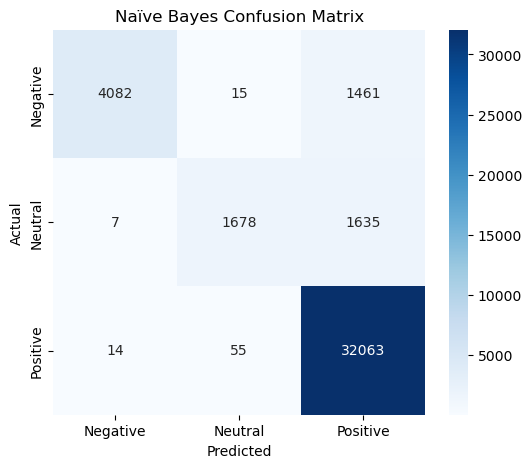

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naïve Bayes Confusion Matrix")
plt.show()


In [32]:
def predict_review(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    return model.predict(vector)[0]

# Example
review = "Very bad quality product and delivery was late"
print("Prediction:", predict_review(review))


Prediction: Negative
